In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from scipy.stats import norm 
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.interpolate import  UnivariateSpline
from PIL import Image
import pathlib
import os
import seaborn as sns




In [ ]:
gal_csv=pd.read_csv('/home/kevin/aufklarung_astro_station/project2/sqlgalaxy_table.csv')
gal_csv.columns

In [ ]:
#STATISTICAL ESTIMATES OF red shift

print('mean:', np.mean(gal_csv['z']))
print('std dev:', np.std(gal_csv['z']))
print('median:', np.median(gal_csv['z']))
plt.figure(figsize=(5,5), dpi=100)
plt.xlabel('Redshift z')
plt.ylabel('Counts')
plt.title('Distribution of redshift z')
plt.hist(gal_csv['z'], bins=100)
'plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'redshift_distribution.png')
plt.show()
#This shows that most star forming galaxies are found at a median redshifts of z: 0.07 

In [ ]:
#COLOR REDSHIFT DISTRIBUTION
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(gal_csv['u'], gal_csv['z'], marker='.', s=5)
plt.title('Color (u)-Redshift Distribution')
plt.xlabel('Color (u)')
plt.ylabel('Redshift')
plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'u_color_redshift.png')
plt.show()

In [ ]:
#U,G,R,I REDSHIFT DISTRIBUTION SUBPLOTS

plt.figure(figsize=(10,10), dpi=100)

plt.subplot(2,2,1)
plt.scatter(gal_csv['u'], gal_csv['z'], marker='.',c='blue', s=5)
plt.title('Color (u)-Redshift Distribution')
plt.xlabel('Color (u)')
plt.ylabel('Redshift')

plt.subplot(2,2,2)
plt.scatter(gal_csv['g'], gal_csv['z'], marker='.', c='green' ,s=5)
plt.title('Color (g)-Redshift Distribution')
plt.xlabel('Color (g)')
plt.ylabel('Redshift')

plt.subplot(2,2,3)
plt.scatter(gal_csv['r'], gal_csv['z'], marker='.', c='red',s=5)
plt.title('Color (r)-Redshift Distribution')
plt.xlabel('Color (r)')
plt.ylabel('Redshift')

plt.subplot(2,2,4)
plt.scatter(gal_csv['i'], gal_csv['z'], marker='.', c='magenta',s=5)
plt.title('Color (i)-Redshift Distribution')
plt.xlabel('Color (i)')
plt.ylabel('Redshift')

plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'ugri_color_redshift.png')



In [ ]:
#CURVE FITTING TO COLOR REDSHIFT DISTRIBUTION BY SCIPY
# Define the model function to fit ( polynomial)
def cubic_polynomial(x, a, b):
    return a*x**4+ b*x**3 

#data
x_data = gal_csv['u']
y_data = gal_csv['z']

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, *params)

# Plot the original data and the fitted model
plt.figure(figsize=(5,5), dpi=100)
plt.scatter(x_data, y_data, label='Original Data', marker='.', s=5)
plt.plot(x_fit, y_fit, 'r', label='Fitted  Polynomial')
plt.title('Curve Fitting to Color-Redshift Data')
plt.xlabel('Color (u)')
plt.ylabel('Redshift')
plt.legend()
#plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'u_color_redshift_model_fit.png')
print(*params)
plt.show()
#params:a=1.6894326598952739e-06, b=-2.12899848230427e-05

In [ ]:

#EXPERIMENTAL CODE FOR DBSCAN CLUSTERING
# Extract relevant columns
data = gal_csv[['u', 'z']]

# Standardize the data as DBSCAN is sensitive to the scale
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=50)

# Fit the model to the scaled data
dbscan.fit(data_scaled)

# Add cluster labels to the original DataFrame
gal_csv['cluster'] = dbscan.labels_

#filter out the data
filtered_data = data[dbscan.labels_ != -1]
# Visualize the clusters
plt.scatter(gal_csv['u'], gal_csv['z'], c=gal_csv['cluster'], cmap='viridis', edgecolor='k')
plt.xlabel('u')
plt.ylabel('z')
plt.title('DBSCAN Clustering')
plt.show()


In [ ]:
#Color (U-R) vs Color  Index (R) vs de Vac Rad (R) vs Redshift
u_r=gal_csv['u'].values - gal_csv['r'].values
r=gal_csv['r'].values

plt.figure(figsize=(10,7))
plt.title('Color (U-R) vs Color  Index (R) vs de Vac Rad (R) vs Redshift (size~ de Vac rad, color~z)')
plt.scatter(r, u_r, marker='.', s=20*gal_csv['deVRad_r'], c=gal_csv['z'])
plt.ylim([0,4])
plt.xlim([12,20])
plt.xlabel('R')
plt.ylabel('U-R')
plt.colorbar()
plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'color_colorindex_devacrad_redshift.png')

In [ ]:
#De Vac RAD VS REDSHIFT
plt.figure(figsize=(5,5))
plt.scatter(gal_csv['deVRad_r'], gal_csv['z'], s=10*gal_csv['z'], c=gal_csv['z'])
plt.title('de Vac Radius (R) vs Redshift (color~z)')
plt.xlabel('de Vac Rad (R)')
plt.ylabel('Redshift')
plt.colorbar()
plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'devacrad_redshift.png')

In [ ]:
##CURVE FITTING TO De Vac RAD VS REDSHIFT BY SCIPY

# Define the model function to fit (cubic polynomial)
def cubic_polynomial(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x**1 + d

# Generate example color-color data
x_data = gal_csv['deVRad_r']
y_data = gal_csv['z']

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the original data and the fitted model
plt.figure(figsize=(5,5))
plt.scatter(x_data, y_data, label='Original Data', marker='.', 
            s=10*gal_csv['z'], c=gal_csv['z'])
plt.plot(x_fit, y_fit, 'r', label='Fitted Cubic Polynomial')
plt.title('Curve Fitting to De Vac Rad vs Redshift Data')
plt.xlabel('de Vac Rad (R) ')
plt.ylabel('Redshift')
plt.colorbar()
print(params)

#plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'devacrad_redshift_modelfit.png')

#params:  1.68203244e-06  9.56383888e-06 -4.58892299e-03  1.08176237e-01

In [ ]:
#COLOR EXTINCTION DISTRIBUTION
for i in ['extinction_u', 'extinction_g', 
            'extinction_r', 'extinction_i']:
                print('Extinction in :', i)
                print('mean:', np.mean(gal_csv[i]))
                print('std dev:', np.std(gal_csv[i]))
                print('median:', np.median(gal_csv[i]))
                print('\n')
                
                

print('mean:', np.mean(gal_csv['extinction_u']))
print('std dev:', np.std(gal_csv['extinction_u']))
print('median:', np.median(gal_csv['extinction_u']))
plt.figure(figsize=(5,5), dpi=100)
plt.xlabel('Extinction (U)')
plt.ylabel('Counts')
plt.title('Distribution of Extinction')
plt.hist(gal_csv['extinction_u'],bins=50, label='U', color='b')
plt.hist(gal_csv['extinction_g'], bins=50, label='G', color='g')
plt.hist(gal_csv['extinction_r'], bins=50, label='R', color='r')
plt.hist(gal_csv['extinction_i'], bins=50, label='I', color='m')
plt.legend()
plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'extinction_distribution.png')


In [ ]:
#COLOR EXTINCTION vs COLOR

plt.figure(figsize=(5,5))
plt.scatter(gal_csv['u'], gal_csv['extinction_u'], marker='.', s=50,c='c', label='U')
plt.scatter(gal_csv['g'], gal_csv['extinction_g'], marker='.', s=50,c='g',label='G')
plt.scatter(gal_csv['r'], gal_csv['extinction_r'], marker='.', s=50,c='r', label='R')
plt.scatter(gal_csv['i'], gal_csv['extinction_i'], marker='.', s=50,c='m', label='I')
plt.title('Color-Color Extinction')
plt.xlabel('Color')
plt.ylabel('Extinction')
plt.legend()
plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'extinction_color.png')




In [ ]:
#EXTTINCTION VS COLOR CURVE FITTING

# Define the model function to fit (cubic polynomial)
def cubic_polynomial(x, a, b, c, d):
    return  b * x + c 

# Generate example color-color data
x_data = gal_csv['g']
y_data = gal_csv['extinction_g']

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the original data and the fitted model
plt.figure(figsize=(5,5))
plt.scatter(x_data, y_data,  marker='.')
plt.plot(x_fit, y_fit, 'r', label='Fitted Cubic Polynomial')
plt.title('Curve Fitting to Color-Color Extinction Data')
plt.xlabel(' Color (G)')
plt.ylabel('Extinction G')
plt.xlim([14,20])
print(params)
#plt.savefig('/home/kevin/aufklarung_astro_station/project2/'+'/'+'extinction_color_modelfit.png')
#params: 0.0103496  -0.03395463


In [ ]:
#De Vac ratio A/B distribution

plt.figure(figsize=(15,15))
plt.title('De Vac Ratio A/B vs Redshift')

plt.subplot(4,1,1)
plt.xlabel('De Vac A/B for U')
plt.ylabel('Redshift')
plt.scatter(gal_csv['deVAB_u'], gal_csv['z'], label='U', s=5) 
plt.legend() 

plt.subplot(4,1,2)
plt.xlabel('De Vac A/B for G')
plt.ylabel('Redshift')
plt.scatter( gal_csv['deVAB_g'], gal_csv['z'], label='G', s=5)
plt.legend() 

plt.subplot(4,1,3)
plt.xlabel('De Vac A/B for R')
plt.ylabel('Redshift')
plt.scatter( gal_csv['deVAB_r'], gal_csv['z'], label='R', s=5)
plt.legend() 

plt.subplot(4,1,4)
plt.xlabel('De Vac A/B for I')
plt.ylabel('Redshift')
plt.scatter( gal_csv['deVAB_r'], gal_csv['z'], label='I', s=5)
plt.legend() 



In [ ]:
#De Vac ratio A/B  VS REDSHIFT curve fitting

# Define the model function to fit (cubic polynomial)
def cubic_polynomial(x, a, b, c, d):
    return  a*x+b

# Generate example color-color data
x_data = gal_csv['deVAB_u']
y_data = gal_csv['z']

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the original data and the fitted model
plt.figure(figsize=(5,5))
plt.scatter(x_data, y_data,  marker='.')
plt.plot(x_fit, y_fit, 'r', label='Fitted Cubic Polynomial')
plt.title('Curve Fitting to De Vac Ratio A/B vs Redshift ')
plt.xlabel('De Vac A/B for U')
plt.ylabel('Redshift')
#plt.xlim([14,20])
print(*params)
#params: 0.023595215076728904 0.06161416767132799

In [ ]:

#USE THIS TO FILTER OUT VERY HIGH OR VERY LOW VALS IN FLUX
#gal_csv_mod_ar=gal_csv[np.abs(gal_csv['ariii7135_flux'])<100]
#plt.hist(gal_csv_mod_ar['ariii7135_flux'], bins=100)
#print(gal_csv_mod_ar)

In [ ]:
#COLOR COLOR RELATIONSHIP
u_minus_g=np.array(gal_csv['u']-gal_csv['g'])
g_minus_r=np.array(gal_csv['g']-gal_csv['r'])


#threshold= 1000
#petro_u_minus_g = np.where(petro_u_minus_g > threshold, 0, petro_u_minus_g)

#petro_g_minus_r = np.where(petro_g_minus_r < -threshold, 0, petro_g_minus_r)

plt.figure(figsize=(5,5))
plt.xlabel(' U-G')
plt.ylabel(' G-R' )
#plt.xscale('log')
#plt.yscale('log')
plt.title('Color Color Diagram')
plt.scatter(u_minus_g, g_minus_r,marker='.')
#plt.xlim([-1,1])
plt.xlim([-1,4])
plt.ylim([-1,2])

In [ ]:
#COLOR COLOR RELATIONSHIP CURVE FITTING
# Define the model function to fit (cubic polynomial)
def cubic_polynomial(x, a, b, c, d):
    return a * x**2+b*x**1

# Generate example color-color data
x_data = u_minus_g
y_data = g_minus_r

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the original data and the fitted model
plt.scatter(x_data, y_data, label='Original Data', marker='.')
plt.plot(x_fit, y_fit, 'r', label='Fitted Cubic Polynomial')
plt.title('Curve Fitting to Color-Color Diagram')
plt.xlabel('U-G')
plt.ylabel('G-R')
plt.xlim([-1,4])
plt.ylim([-1,2])
#plt.legend()
plt.show()
print(params)
#params: 0.11727411, 0.29040224



In [ ]:
#Flux vs radius for given color index
petro_u_filtered=gal_csv['petroMag_u']
#threshold= -1000
#petro_u_filtered = np.where( gal_csv['petroMag_u'] < threshold, 0, gal_csv['petroMag_u'])
plt.scatter((petro_u_filtered), gal_csv['petroRad_u'], marker='.')

In [ ]:
# Generate example color-color data
x_data = petro_u_filtered
y_data = gal_csv['petroRad_u']

# Choose the degree of the polynomial
degree = 4
coefficients = np.polyfit(x_data, y_data, degree)

# Create a polynomial function
poly_function = np.poly1d(coefficients)

# Plot the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = poly_function(x_fit)
plt.plot(x_fit, (y_fit), label='Fitted Curve', color='red')
plt.scatter((petro_u_filtered), gal_csv['petroRad_u'], marker='.')
plt.yscale('log')
plt.xlim([12,26])


In [ ]:
gal_csv.columns

In [ ]:
#METALLICITY DISTRIBUTION p50
plt.hist(gal_csv['oh_p50'], bins=50)
plt.xlabel('12+log(O/H) p50')
plt.ylabel('Counts')
print('mean:', np.mean(gal_csv['oh_p50']))
print('std dev:', np.std(gal_csv['oh_p50']))
print('median:', np.median(gal_csv['oh_p50']))

"""
mean: 8.9057073644
std dev: 0.21001436736883317
median: 8.967692
"""

In [ ]:
#METALLIICITY VS REDSHIFT
plt.figure(figsize=(5,5))
plt.title('METALLICITY VS REDSHIFT colored/sized with devac rad i')
plt.xlabel('12+log(O/H) p50')
plt.ylabel('Redshift')
plt.scatter(gal_csv['oh_p50'], gal_csv['z'],
			c=gal_csv['deVRad_i'],
			  s=5*gal_csv['deVRad_i'], 
			  marker=".")
plt.colorbar()

In [ ]:
gal_csv.columns

In [ ]:
# SFR VS REDSHIFT colored/sized with devac rad r
plt.figure(figsize=(7,7))
plt.scatter( gal_csv["sfr_tot_p50"],gal_csv["z"],c=gal_csv["deVAB_r"],
			s=5*gal_csv['deVRad_r'], 
			  marker=".")
plt.title('SFR VS REDSHIFT colored/sized with devac rad r')
plt.xlabel('SFR p50 ')
plt.ylabel('Redshift')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('devac rad r',fontsize=8)


In [ ]:
# SFR VS REDSHIFT colored/sized with devac rad r curve fitting

def cubic_polynomial(x, a, b, c, d):
    return  a * x**2+b*x**1+c

# Generate example color-color data
x_data = gal_csv['sfr_tot_p50']
y_data = gal_csv['z']

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit, d_fit)

# Plot the original data and the fitted model
plt.figure(figsize=(5,5))
plt.scatter(x_data, y_data, c=gal_csv["deVAB_r"],
			s=5*gal_csv['deVRad_r'],  marker='.')
plt.plot(x_fit, y_fit, 'r')
plt.title('SFR VS REDSHIFT ')
plt.xlabel('SFR p50 ')
plt.ylabel('Redshift')
plt.ylim([-0.01,0.3])
plt.xlim([-3,2])
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title('devac rad r',fontsize=8)

print(*params)
# Params:0.010336945463289327 0.05324721979340294 0.06406797144184245

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(gal_csv["sfr_tot_p50"], gal_csv["oh_p50"], 
			c=gal_csv["z"], s=5*gal_csv['deVRad_r']
			 , marker=".")

In [ ]:
# Better cleaning of data to remove outliers
exclude_columns=["specObjID", "class", "subClass", "ra", "dec", "mjd"]
gal_csv_exc=gal_csv.drop(columns=exclude_columns)


gal_csv_exc= gal_csv_exc[ (gal_csv_exc
						 <= 
						 10*gal_csv_exc.median())
						  &
						  (gal_csv_exc 
						 >= 
						 -10*gal_csv_exc.median())  ]

gal_csv_exc.fillna(0,inplace=True)


In [ ]:
#SFR vs Logmass
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc["sfr_tot_p50"]/gal_csv_exc["lgm_tot_p50"], 
			gal_csv_exc["lgm_tot_p50"],
			s=1*gal_csv_exc["deVRad_i"], 
			c=gal_csv_exc["z"])
#plt.xscale("log")
#plt.xlim([-1000,1000])
plt.title('SFR VS Mass, sized with devac rad i ')
plt.xlabel('SFR p50 ')
plt.ylabel('log Mass p50')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title("z",fontsize=8)

In [ ]:
# SFR VS Logmass colored/sized with devac rad r curve fitting
def cubic_polynomial(x, a, b, c, d):
    return  a * x**2+b*x +c

# Generate example color-color data
x_data = gal_csv_exc["sfr_tot_p50"]
y_data = gal_csv_exc["lgm_tot_p50"]

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit, d_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit, d_fit)
plt.scatter(gal_csv_exc["sfr_tot_p50"], 
			gal_csv_exc["lgm_tot_p50"],
			s=1*gal_csv_exc["deVRad_i"], 
			c=gal_csv_exc["z"])
plt.title('SFR VS Mass, sized with devac rad i ')
plt.xlabel('SFR p50 ')
plt.ylabel('log Mass p50')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title("z",fontsize=8)
plt.ylim([7,12])
plt.plot(x_fit, y_fit, 'r')

print(params)

# params: -0.04683688  0.92887345  9.90719999

In [ ]:
#Log mass vs color i-r
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc["i"]-gal_csv_exc["r"], 
			gal_csv_exc["lgm_tot_p50"],
			s=1*gal_csv_exc["deVRad_i"], 
			c=gal_csv_exc["z"])
plt.xlim([-0.8,0.1])
plt.ylim([6,12])
plt.title('Color VS Mass, \n sized with devac rad i, \ncolored with z')
plt.xlabel('i-r ')
plt.ylabel('log Mass p50')
clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title("z",fontsize=8)

In [ ]:

def cubic_polynomial(x, a, b, c):
    return  a * x **2 + b * x ** 1 + c 


# Generate example color-color data


i_r = gal_csv_exc["i"] - gal_csv_exc["r"]
lgm= gal_csv_exc["lgm_tot_p50"]


# Define the range for x axis
lower_bound = -1
upper_bound = 1

gal_csv_exc_filtered=  gal_csv_exc[(i_r >= lower_bound) & (i_r <= upper_bound)]


# Filter out the outliers
x_data = gal_csv_exc_filtered["i"] - gal_csv_exc_filtered["r"]
y_data = gal_csv_exc_filtered["lgm_tot_p50"]


# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit)

plt.scatter(x_data, y_data,
			s=1*gal_csv_exc_filtered["deVRad_i"], 
			c=gal_csv_exc_filtered["z"])

plt.xlim([-0.8,0.1])
plt.ylim([6,12])
plt.title('Color VS Mass, \n sized with devac rad i, \ncolored with z')

plt.xlabel('i-r ')
plt.ylabel('log Mass p50')

plt.plot(x_fit, y_fit, 'r')

clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title("z",fontsize=8)

print(params)
#params  0.57090676 -4.79219684  8.23912187


Text(0, 0.5, 'metalicity')

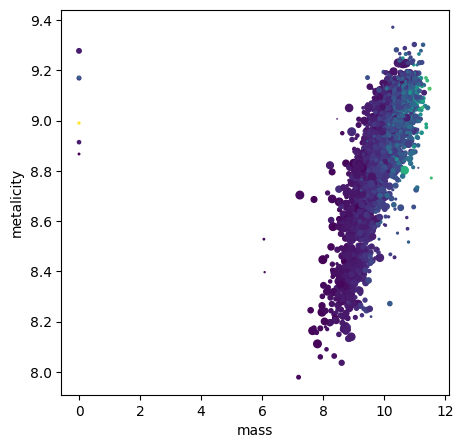

In [107]:
#Log mass vs color i-r
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc["lgm_tot_p50"],
			gal_csv_exc["oh_p50"],
			s=1*gal_csv_exc["deVRad_i"], 
			c=gal_csv_exc["z"])

plt.xlabel("mass")
plt.ylabel("metalicity")

Text(0, 0.5, 'metalicity')

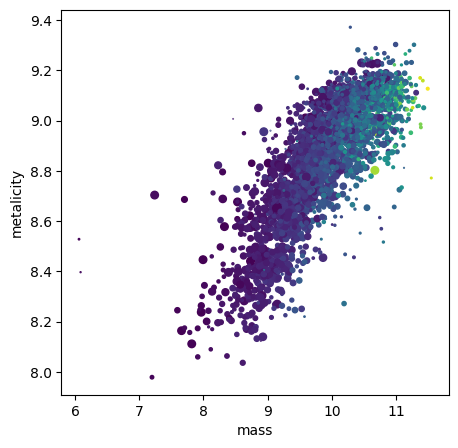

In [111]:
gal_csv_exc_x_filtered= gal_csv_exc[gal_csv_exc["lgm_tot_p50"]>=4]
plt.figure(figsize=(5,5))
plt.scatter(gal_csv_exc_x_filtered["lgm_tot_p50"],
			gal_csv_exc_x_filtered["oh_p50"],
			s=1*gal_csv_exc_x_filtered["deVRad_i"], 
			c=gal_csv_exc_x_filtered["z"])

plt.xlabel("mass")
plt.ylabel("metalicity")


[-0.04308909  1.12647412  1.95954031]


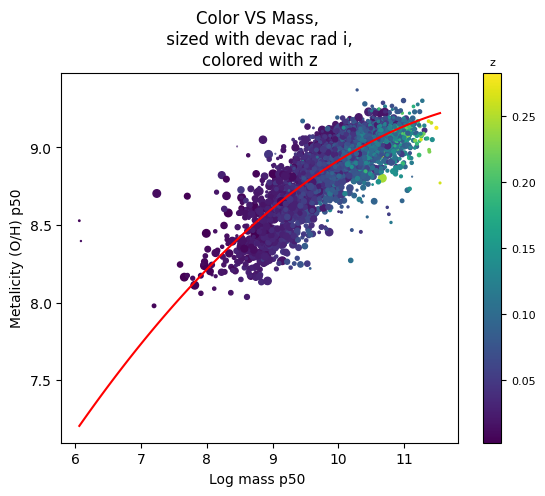

In [114]:
def cubic_polynomial(x, a, b, c):
    return  a * x **2 + b * x ** 1 + c 


x_data=gal_csv_exc_x_filtered["lgm_tot_p50"]
y_data =gal_csv_exc_x_filtered["oh_p50"]

# Fit the model using curve_fit
params, covariance = curve_fit(cubic_polynomial, x_data, y_data)

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate points for the fitted model
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = cubic_polynomial(x_fit, a_fit, b_fit, c_fit)

plt.scatter(x_data, y_data,
			s=1*gal_csv_exc_x_filtered["deVRad_i"], 
			c=gal_csv_exc_x_filtered["z"])


plt.title('Color VS Mass, \n sized with devac rad i, \ncolored with z')

plt.xlabel('Log mass p50 ')
plt.ylabel('Metalicity (O/H) p50')

plt.plot(x_fit, y_fit, 'r')

clb=plt.colorbar()
clb.ax.tick_params(labelsize=8) 
clb.ax.set_title("z",fontsize=8)

print(params)
#params -0.04308909  1.12647412  1.95954031